In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
df = pd.read_csv("StudentsPerformance.csv")
             

# Load the dataset
#df = pd.read_csv("your_dataset.csv")

# Display first few rows of the dataset
print(df.head())

# Descriptive statistics for numerical columns
print(df.describe())

# Count unique values in categorical columns
print(df['gender'].value_counts())
print(df['race/ethnicity'].value_counts())
print(df['parental level of education'].value_counts())

# Correlation between scores
print(df[['math score', 'reading score', 'writing score']].corr())

    
   #Date Cleaning
   # 
   
   

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

In [9]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with the mean
df['math score'].fillna(df['math score'].mean(), inplace=True)
df['reading score'].fillna(df['reading score'].mean(), inplace=True)
df['writing score'].fillna(df['writing score'].mean(), inplace=True)

# Fill missing categorical values with the mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['lunch'].fillna(df['lunch'].mode()[0], inplace=True)

# Handle outliers (optional: for scores below 0 or above 100)
for col in ['math score', 'reading score', 'writing score']:
    df = df[(df[col] >= 0) & (df[col] <= 100)]

# Verify cleaned data
print(df.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7276\1964752914.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7276\1964752914.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

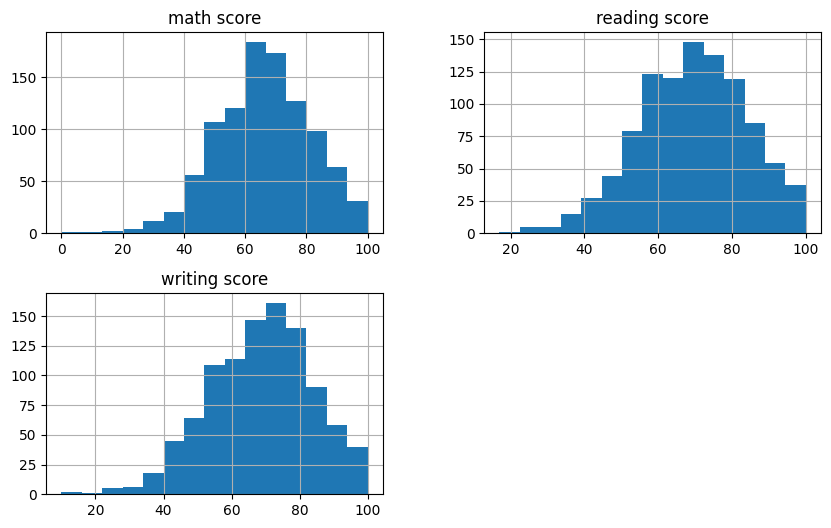

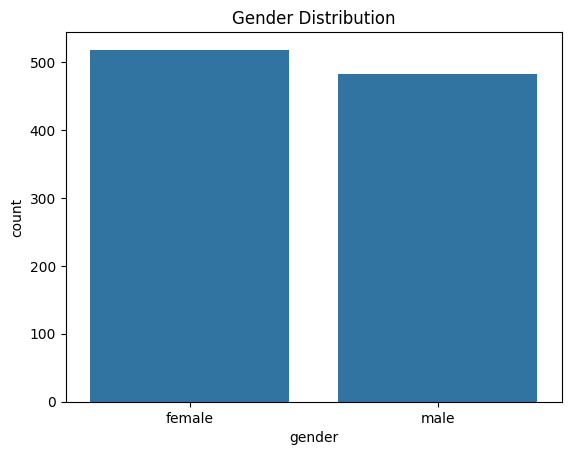

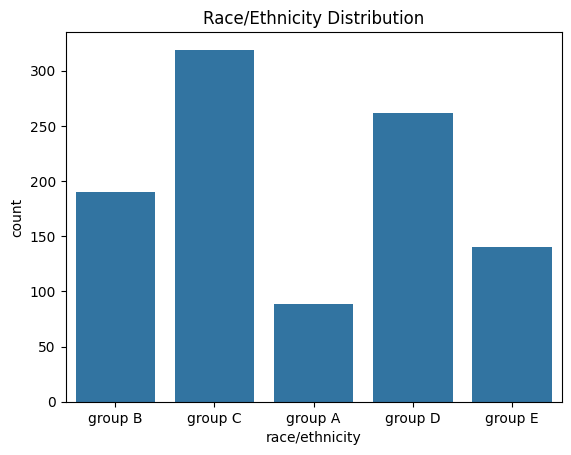

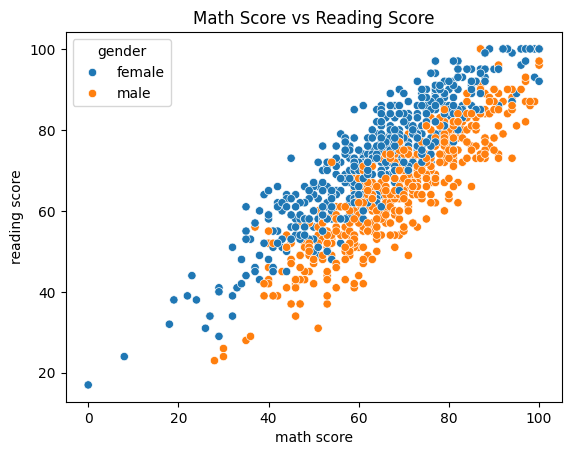

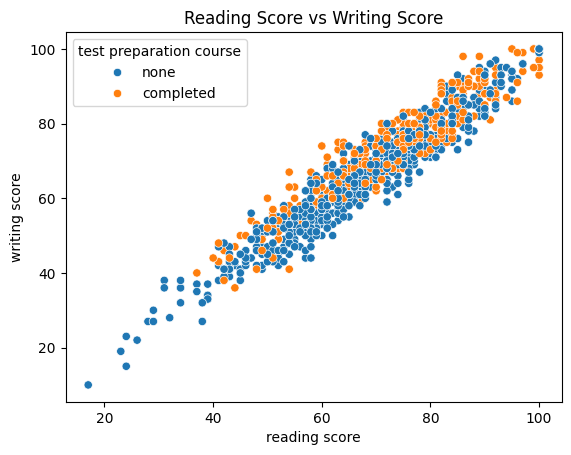

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of scores
df[['math score', 'reading score', 'writing score']].hist(bins=15, figsize=(10, 6))
plt.show()

# Bar plot for categorical variables
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x='race/ethnicity', data=df)
plt.title("Race/Ethnicity Distribution")
plt.show()

# Scatterplot to show relationships between scores
sns.scatterplot(x='math score', y='reading score', hue='gender', data=df)
plt.title("Math Score vs Reading Score")
plt.show()

sns.scatterplot(x='reading score', y='writing score', hue='test preparation course', data=df)
plt.title("Reading Score vs Writing Score")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Features and target variable
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Feature importance (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


Mean Squared Error: 29.095169866715494
R^2 Score: 0.8804332983749564
                                          Feature  Coefficient
2                                     gender_male    13.064884
6                          race/ethnicity_group E     4.892649
12                                 lunch_standard     3.510075
13                   test preparation course_none     3.289642
10       parental level of education_some college     0.998856
8         parental level of education_high school     0.929312
11   parental level of education_some high school     0.756470
1                                   writing score     0.724148
3                          race/ethnicity_group B     0.359323
0                                   reading score     0.236023
5                          race/ethnicity_group D    -0.613236
4                          race/ethnicity_group C    -0.625617
7   parental level of education_bachelor's degree    -0.716901
9     parental level of education_master's degree

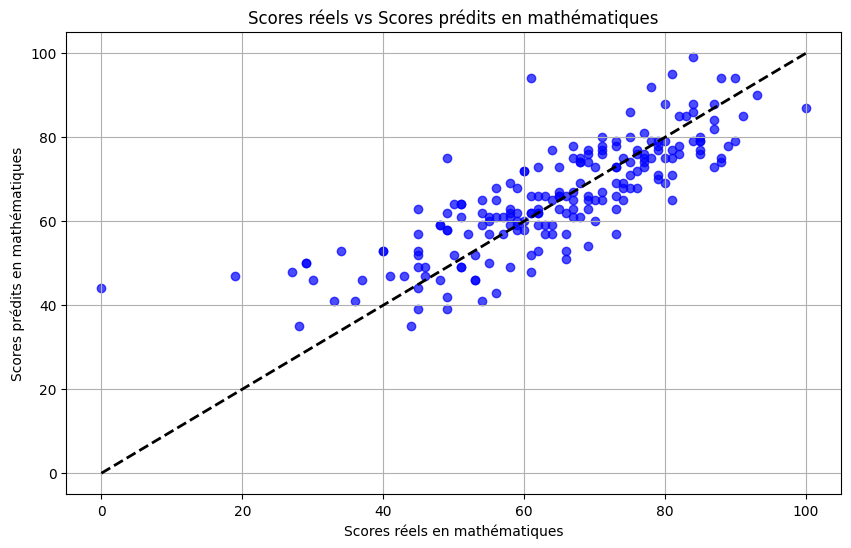

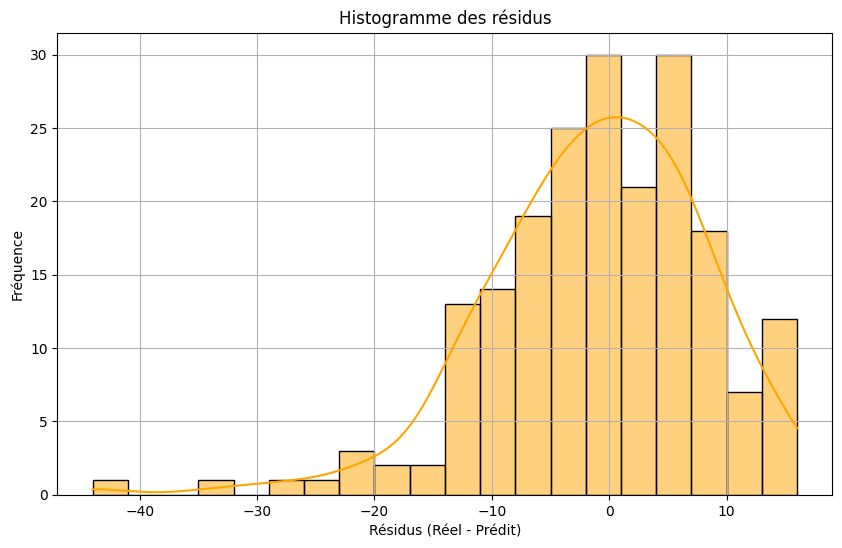

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7276\206593388.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='viridis')


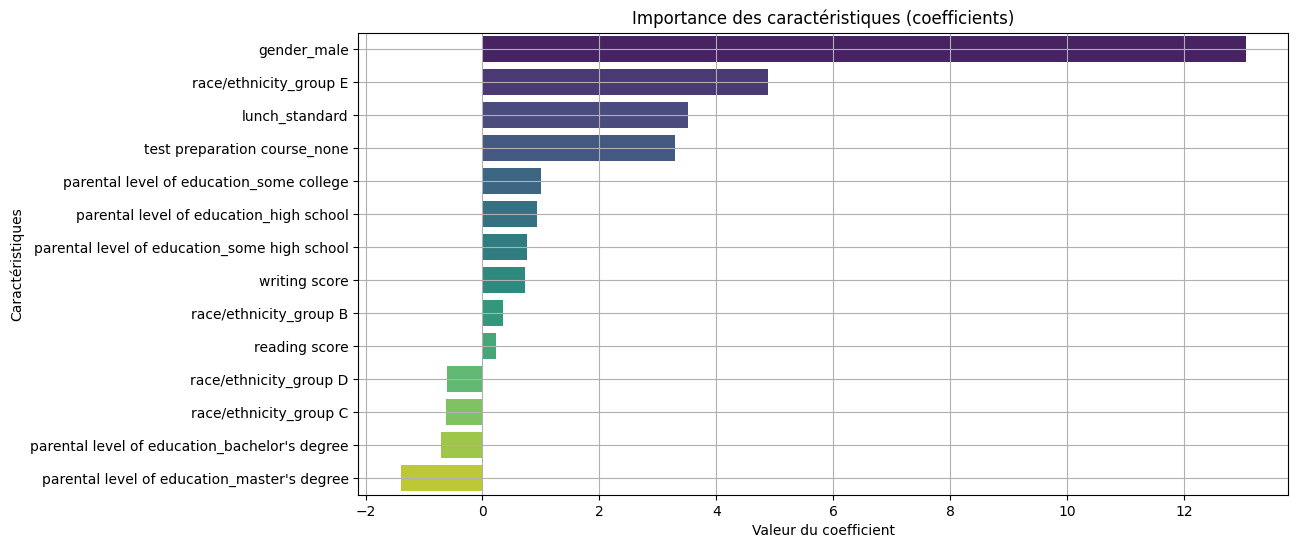

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Graphique de dispersion : Scores réels vs Prédits en mathématiques
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ligne des prédictions parfaites
plt.title('Scores réels vs Scores prédits en mathématiques')
plt.xlabel('Scores réels en mathématiques')
plt.ylabel('Scores prédits en mathématiques')
plt.grid(True)
plt.show()

# 2. Histogramme des résidus (erreurs)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title('Histogramme des résidus')
plt.xlabel('Résidus (Réel - Prédit)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# 3. Diagramme en barres de l'importance des caractéristiques (coefficients)
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='viridis')
plt.title('Importance des caractéristiques (coefficients)')
plt.xlabel('Valeur du coefficient')
plt.ylabel('Caractéristiques')
plt.grid(True)
plt.show()



In [17]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
print(importance.sort_values(by='Importance', ascending=False))


Mean Squared Error: 43.57616752083879
R^2 Score: 0.8209235668182373
                                          Feature  Importance
2                                     gender_male    0.399842
0                                   reading score    0.204788
1                                   writing score    0.118435
6                          race/ethnicity_group E    0.059525
12                                 lunch_standard    0.051839
13                   test preparation course_none    0.037416
4                          race/ethnicity_group C    0.020696
10       parental level of education_some college    0.018911
8         parental level of education_high school    0.018807
3                          race/ethnicity_group B    0.016349
5                          race/ethnicity_group D    0.014878
7   parental level of education_bachelor's degree    0.012911
11   parental level of education_some high school    0.012906
9     parental level of education_master's degree    0.012698


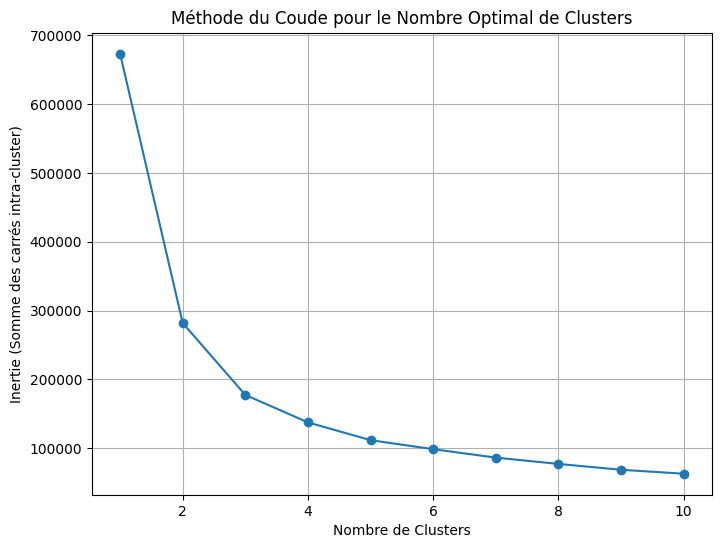

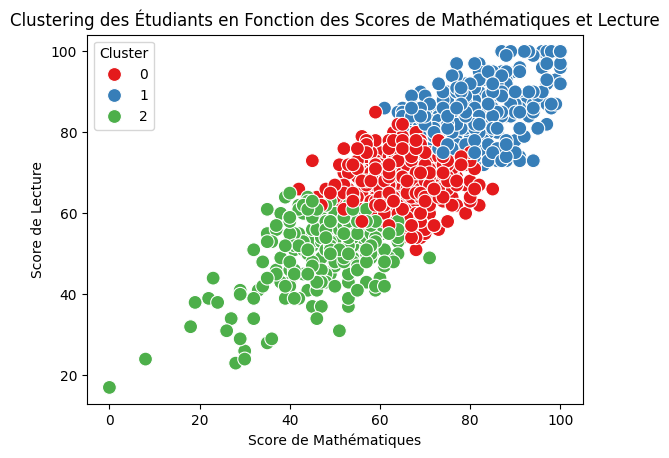

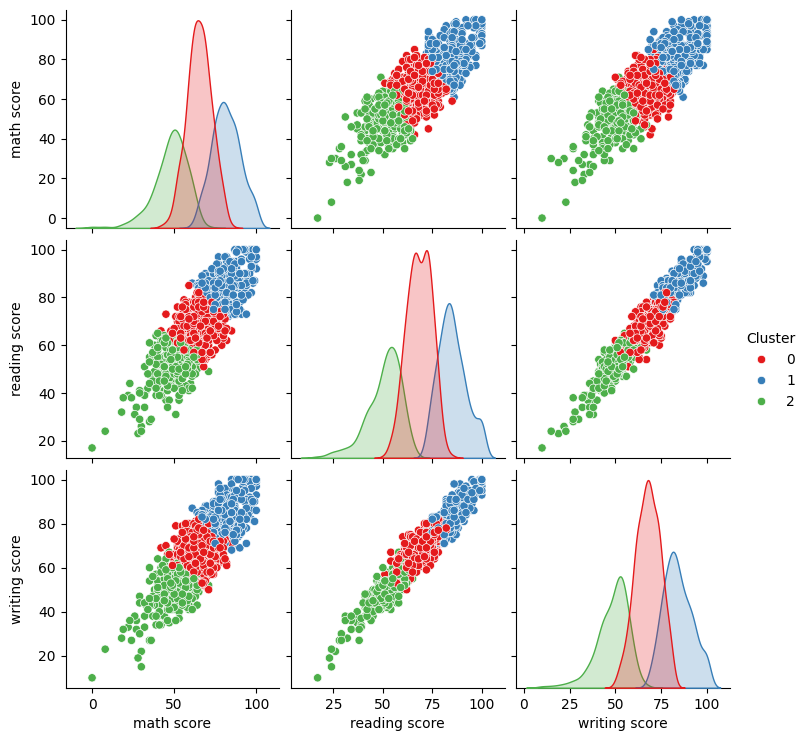

Centres des Clusters (Centroides de chaque cluster) :
   math score  reading score  writing score
0   65.197727      68.327273      67.695455
1   81.661342      84.980831      84.025559
2   47.943320      50.631579      48.453441

Scores Moyens par Cluster :
         math score  reading score  writing score
Cluster                                          
0         65.197727      68.327273      67.695455
1         81.661342      84.980831      84.025559
2         47.943320      50.631579      48.453441


In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sélectionner les colonnes des scores pour le clustering
# Ici, nous utilisons les scores de mathématiques, lecture et écriture
scores = df[['math score', 'reading score', 'writing score']]

# Déterminer le nombre optimal de clusters en utilisant la méthode du coude (elbow method)
inertia = []  # Liste pour stocker l'inertie pour chaque nombre de clusters

# Boucle pour calculer l'inertie pour différentes valeurs de k (nombre de clusters)
for k in range(1, 11):  # Nous testons de 1 à 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)  # Créer un modèle K-Means
    kmeans.fit(scores)  # Entraîner le modèle avec les scores
    inertia.append(kmeans.inertia_)  # Stocker l'inertie (somme des carrés intra-cluster)

# Tracer la courbe du coude pour visualiser le nombre optimal de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du Coude pour le Nombre Optimal de Clusters")
plt.xlabel("Nombre de Clusters")
plt.ylabel("Inertie (Somme des carrés intra-cluster)")
plt.grid(True)
plt.show()

# En observant le graphique, on choisit le nombre optimal de clusters (par exemple, k=3)
optimal_k = 3  # Ce nombre peut être ajusté en fonction de la courbe du coude

# Entraîner K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scores)  # Assigner un cluster à chaque étudiant

# Visualiser les clusters sur un graphique de dispersion (math vs lecture)
sns.scatterplot(x='math score', y='reading score', hue='Cluster', data=df, palette='Set1', s=100, marker='o')
plt.title("Clustering des Étudiants en Fonction des Scores de Mathématiques et Lecture")
plt.xlabel("Score de Mathématiques")
plt.ylabel("Score de Lecture")
plt.legend(title="Cluster", loc='upper left')
plt.show()

# Visualiser les clusters en tenant compte des trois scores à l'aide d'un pairplot
sns.pairplot(df, vars=['math score', 'reading score', 'writing score'], hue='Cluster', palette='Set1')
plt.show()

# Analyser les centres des clusters (les centroides de chaque cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['math score', 'reading score', 'writing score'])
print("Centres des Clusters (Centroides de chaque cluster) :")
print(cluster_centers)

# Calculer les moyennes des scores pour chaque cluster
cluster_means = df.groupby('Cluster')[['math score', 'reading score', 'writing score']].mean()
print("\nScores Moyens par Cluster :")
print(cluster_means)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Strip spaces from column names if necessary
df_encoded.columns = df_encoded.columns.str.strip()

# Print column names to check the exact name of your target column
print("Columns in df_encoded:", df_encoded.columns)

# Ensure that the target column exists in the DataFrame
if 'test preparation course_Completed' in df_encoded.columns:
    X = df_encoded.drop('test preparation course_Completed', axis=1)
    y = df_encoded['test preparation course_Completed']
else:
    print("Column 'test preparation course_Completed' not found. Please check column names.")
    print("Available columns:", df_encoded.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
print(importance.sort_values(by='Importance', ascending=False))




Columns in df_encoded: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'math score', 'reading score', 'writing score', 'Cluster',
       'test preparation course_none'],
      dtype='object')
Column 'test preparation course_Completed' not found. Please check column names.
Available columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'math score', 'reading score', 'writing score', 'Cluster',
       'test preparation course_none'],
      dtype='object')
Accuracy: 0.055
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.0

c:\python\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: 

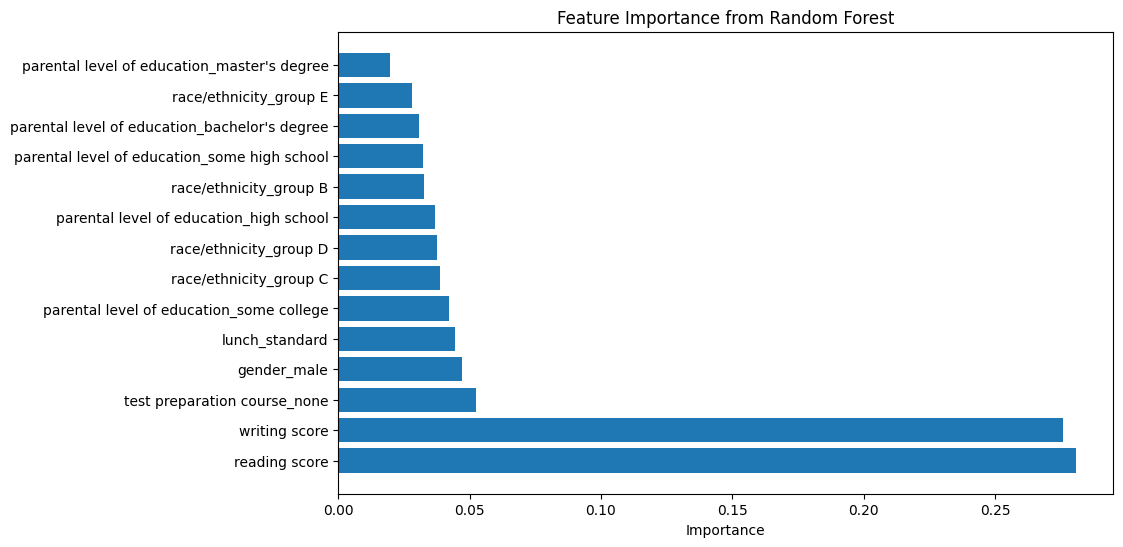

In [24]:
import matplotlib.pyplot as plt

# Plotting feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


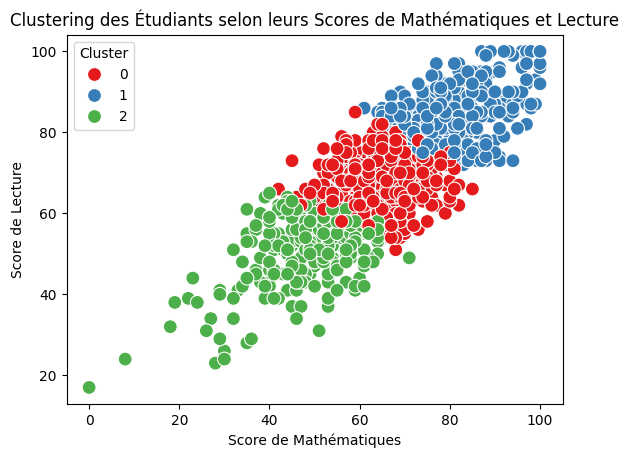

Centres des Clusters :
   math score  reading score  writing score
0   65.197727      68.327273      67.695455
1   81.661342      84.980831      84.025559
2   47.943320      50.631579      48.453441

Moyennes des Scores par Cluster :
         math score  reading score  writing score
Cluster                                          
0         65.197727      68.327273      67.695455
1         81.661342      84.980831      84.025559
2         47.943320      50.631579      48.453441


In [35]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df soit le DataFrame contenant les données des étudiants
# Sélectionner les colonnes pertinentes (scores de mathématiques, lecture et écriture)
scores = df[['math score', 'reading score', 'writing score']]

# 1. Appliquer K-Means avec le nombre optimal de clusters (k=3 dans cet exemple)
optimal_k = 3  # Choisir 3 clusters, basé sur l'analyse préliminaire

# Appliquer K-Means avec 3 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scores)

# 2. Visualiser les clusters (math vs lecture)
sns.scatterplot(x='math score', y='reading score', hue='Cluster', data=df, palette='Set1', s=100, marker='o')
plt.title("Clustering des Étudiants selon leurs Scores de Mathématiques et Lecture")
plt.xlabel("Score de Mathématiques")
plt.ylabel("Score de Lecture")
plt.legend(title="Cluster", loc='upper left')
plt.show()

# 3. Analyser les centres des clusters (centroides)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['math score', 'reading score', 'writing score'])
print("Centres des Clusters :")
print(cluster_centers)

# 4. Calculer la moyenne des scores pour chaque cluster
cluster_means = df.groupby('Cluster')[['math score', 'reading score', 'writing score']].mean()
print("\nMoyennes des Scores par Cluster :")
print(cluster_means)

# 5. Interpréter les résultats :
# - Par exemple, si un cluster a des scores faibles dans toutes les matières, cela peut indiquer un groupe à risque.
# - Ce groupe pourrait nécessiter des interventions ciblées (tutorat, soutien en mathématiques, etc.).
